In [1]:
#from model_phantom_noise import *
from model_phantom_DB import *
from linares_plot import * 
import itertools

%matplotlib inline
%config InlineBackend.figure_format = 'png' ## 'svg'

%load_ext autoreload
%autoreload 2


['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


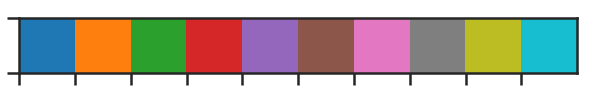

In [2]:
#Palettes
print(sns.color_palette("tab10").as_hex())
sns.palplot(sns.color_palette("tab10"))
plt.show()
c_on = 'darkorange' #'#ff7f0e'
c_off = 'dodgerblue' #'#1f77b4'

onoff_pal=[c_on, c_off]
offon_pal = [c_off, c_on]

pal_cyan = sns.color_palette("RdBu_r", n_colors=200)[40:] #RdBu_r
ltc= 'gold'  #'springgreen'
lw_t=3
N=512
stimon = 50
stimoff = 50 + floor(100/2) ;


nsteps=int(floor(750));
p_targ2 = int((N * 90)/360)
p_dist = int((N * (90+57) )/360)
p_dist2 = int((N * (90+170) )/360)
sns.set_context("poster", font_scale=1.1)
sns.set_style("ticks")

In [3]:
def hemap(an):
    RE_sorted=flipud(an[4])
    sns.heatmap(RE_sorted, cmap=pal_cyan, vmin=0, vmax=17,  cbar=True)
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    plt.gca().plot([stimon, stimon+400], [p_targ2, p_targ2], ls='--', color =ltc, linewidth=lw_t) ## flipped, so it is p_target 
    #plt.gca().set_xticks([])
    plt.gca().set_xticks([0,an[4].shape[1]/2, an[4].shape[1]])
    plt.gca().set_xticklabels(['0', str(an[4].shape[1]), str(an[4].shape[1]*2)], rotation=0)
    #axn.set_xticks([0,simul[4].shape[1]/2, simul[4].shape[1]])
    plt.gca().set_xticklabels(['0s', str(an[4].shape[1]/1000) + 's', str( int(an[4].shape[1]*2/1000) ) + 's'], rotation=0)
    plt.gca().set_yticks([0, N/4, N/2,  3*N/4, N ])
    #plt.gca().set_yticklabels(['0','90','180', '270', '360'])
    #plt.gca().set_yticklabels(['0','','$^\pi$', '', '2$^\pi$'])
    plt.gca().set_yticklabels(['0','','180', '', '360'])
    plt.gca().set_xlabel('time (ms)');
    plt.gca().set_ylabel('neuron preferred location ($^\circ$)');

In [69]:

def heatmap_rate(RE, time_simulation, order2, angle_separation, target_onset, 
                 distractor_onset, pres_period, ON_OFF, save_name=False):
    #pal_cyan = sns.color_palette("viridis")
    
    dims=np.shape(RE)
    dimN = dims[0]
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(RE, cmap="cividis", vmin=0, vmax=20,  cbar=True, 
                cbar_kws={"shrink": .82, 'ticks' : [0, 10, 20], 'label': 'rate (Hz)'})
    ax.figure.axes[-1].yaxis.label.set_size(20)
    ax.figure.axes[-1].tick_params(labelsize=20)
    ax.axis('tight')
    plt.gca().set_ylabel('')
    plt.gca().set_xlabel('')
    plt.gca().set_title('')
    p_stim = (180+angle_separation/2) * (dims[0]/360)
    p_dist = (180-angle_separation/2) * (dims[0]/360) 

    stimon = target_onset/2
    stimoff = (target_onset + pres_period) / 2
    diston = distractor_onset/2
    distoff = (distractor_onset + pres_period) / 2


    #plt.gca().plot([stimon, stimon+400], [p_stim, p_stim], ls='--', color ='blue', linewidth=1) 
    #plt.gca().plot([diston, diston+400], [p_dist, p_dist], ls='--', color ='red', linewidth=1) 

    plt.gca().set_xticks([])
    plt.gca().set_xticklabels([])
    #
    plt.gca().set_yticks([0, int(dimN/4), int(dimN/2),  int(3*dimN/4), int(dimN) ])
    plt.gca().set_yticklabels(['0','','180', '', '360'], fontsize=20)

    plt.gca().set_xlabel('', fontsize=20);
    plt.gca().set_ylabel('neuron preferred ($^\circ$)', fontsize=20);
    plt.gca().set_ylim(dimN+60, -45)

    ###

    ##line stims  
    c1='k'
    c2='k'
    
    if order2==False:
        s1on=stimon
        s1off=stimoff
        s2on=diston
        s2off=distoff
        c1='darkorange'
    else:
        s1on=diston
        s1off=distoff
        s2on=stimon
        s2off=stimoff
        c2='darkorange'

    plt.plot([0, s1on], [-15, -15], linestyle='-', color='k', linewidth=2)
    plt.plot([s1on, s1on], [-15, -40], linestyle='-', color=c1, linewidth=2)
    plt.plot([s1on, s1off], [-40, -40], linestyle='-', color=c1, linewidth=2)
    plt.plot([s1off, s1off], [-15, -40], linestyle='-', color=c1, linewidth=2)
    plt.plot([s1off, s2on], [-15, -15], linestyle='-', color='k', linewidth=2)
    plt.plot([s2on, s2on], [-15, -40],linestyle='-', color=c2, linewidth=2)
    plt.plot([s2on, s2off], [-40, -40],linestyle='-', color=c2, linewidth=2)
    plt.plot([s2off, s2off], [-15, -40], linestyle='-', color=c2, linewidth=2)
    plt.plot([s2off, dims[1]], [-15, -15], linestyle='-', color='k', linewidth=2)
    
    ###
    if ON_OFF=='ON':
        plt.text(dims[1]-300, 450, 'ON', weight="bold", fontsize=28, color='white');
    else:
        plt.text(dims[1]-300, 450, 'OFF', weight="bold", fontsize=28, color='white');
        

    
    #time
    x1sec = 1000 * dims[1] / time_simulation
    plt.plot([dims[1]-x1sec, dims[1]], [dimN+30, dimN+30], 'k-', linewidth=2)
    plt.text(dims[1]-300, 600, '1s', fontsize=20);
    
    
    if save_name!=False:
        plt.savefig(save_name + '.png', transparent=True) ##to save it transparent
    plt.show()

## Examples

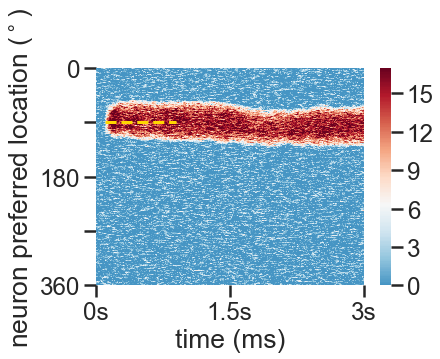

In [15]:
fee=1
fei=1
fie=1
fii=1

on_alone= model(totalTime=3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
           angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(on_alone)
plt.show()

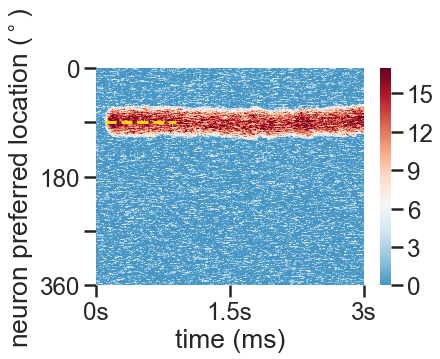

In [6]:
off_alone= model(totalTime=3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
           angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=-3.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fii,
           GEI=0.13*fei,
           GIE=0.042*fie, 
           sigE=7., sigI=5., k_noise=0.6,           
           kappa_E=45, 
           kappa_I=0.3, 
           kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
           phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)

hemap(off_alone)
plt.show()

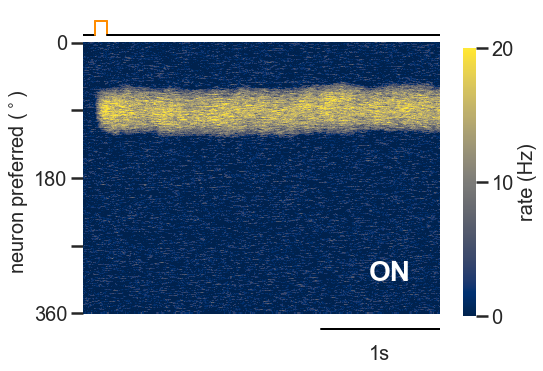

In [71]:
heatmap_rate( flipud(on_alone[4]), time_simulation=3000, order2=False, 
              angle_separation=55, target_onset=100, distractor_onset=4000, 
              pres_period=100, ON_OFF='ON', save_name=False)

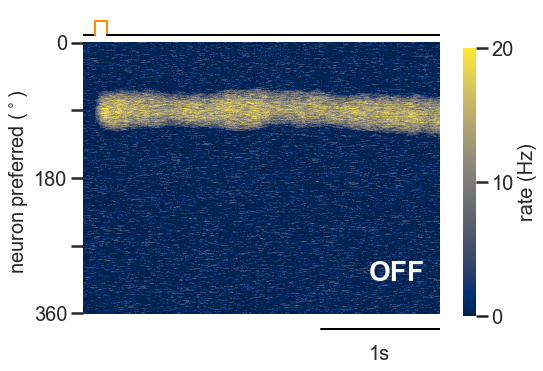

In [72]:
heatmap_rate( flipud(off_alone[4]), time_simulation=3000, order2=False, 
              angle_separation=55, target_onset=100, distractor_onset=4000, 
              pres_period=100, ON_OFF='OFF', save_name=False)


## Mean activity during the delay period

In [37]:
RE_ON=[]
for i in range(10):
    fee=1
    fei=1
    fie=1
    fii=1
    on_alone= model(totalTime=3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
               angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=0.05, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fii,
               GEI=0.13*fei,
               GIE=0.042*fie, 
               sigE=7., sigI=5., k_noise=0.6,           
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    ##
    RE_ON.append(on_alone[4])


In [38]:
RE_OFF=[]
for i in range(10):
    fee=1
    fei=1
    fie=1
    fii=1
    off_alone= model(totalTime=3000, targ_onset_1=100, targ_onset_2=4000, angle_target_i=90, presentation_period=100,
               angle_separation=55, tauE=20, tauI=10,  n_stims=2, I0E=0-3.5, I0I=0.5, 
               GEE=0.068*fee,
               GII= 0.13*fii,
               GEI=0.13*fei,
               GIE=0.042*fie, 
               sigE=7., sigI=5., k_noise=0.6,           
               kappa_E=45, 
               kappa_I=0.3, 
               kappa_stim=40., N=512, stim_strengthE=9.4, stim_strengthI=0.,
               plot_connectivity=False, plot_rate=False, plot_hm=False , plot_fit=False, 
               phantom_st=1.2, phantom_onset=50000, phnatom_duration=100)
    ##
    RE_OFF.append(off_alone[4])

In [39]:
means_on = np.array( [np.mean(RE_ON[i][:, 100:], axis=0) for i in range(len(RE_ON))] )
means_off = np.array( [np.mean(RE_OFF[i][:, 100:], axis=0) for i in range(len(RE_OFF))] )

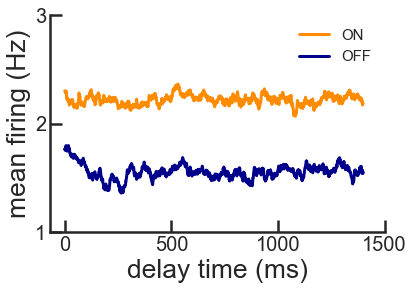

In [52]:
plt.plot(np.mean(means_on, axis=0), color='darkorange', label='ON' )
plt.plot(np.mean(means_off, axis=0), color='darkblue', label='OFF' )
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.ylabel('mean firing (Hz)')
plt.xlabel('delay time (ms)')
plt.xticks([0,500, 1000, 1500], fontsize=20)
plt.ylim(1,3)
plt.yticks([1,2,3], fontsize=20)
plt.legend(loc=1, frameon=False, prop={'size': 15})
plt.savefig('C:\\Users\\David\\Desktop\\delay_diff_on_off.svg', transparent=True)